Data cleaning and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\91979\Downloads\archive\credit_card_fraud_10k.csv')
df.head()


,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [5]:
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [6]:
print("original shape: ",df.shape)

original shape:  (10000, 10)


In [7]:
#checking missing value
print("missing value:\n ",df.isnull().sum())

missing value:
  transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64


In [8]:
#dropping transaction_id because it's just a unique number and it does not help detect fraud.
df.drop("transaction_id",axis=1,inplace = True)

In [9]:
#converting merchant_category to numerical value using one hot encoding
df = pd.get_dummies(df,columns=["merchant_category"],drop_first=True)

In [10]:
print("\n cleaned Dataset shape: ",df.shape)


 cleaned Dataset shape:  (10000, 12)


In [11]:
print("\n data types: ")
print(df.dtypes)


 data types: 
amount                           float64
transaction_hour                   int64
foreign_transaction                int64
location_mismatch                  int64
device_trust_score                 int64
velocity_last_24h                  int64
cardholder_age                     int64
is_fraud                           int64
merchant_category_Electronics       bool
merchant_category_Food              bool
merchant_category_Grocery           bool
merchant_category_Travel            bool
dtype: object


In [12]:
print(df.head())

   amount  transaction_hour  foreign_transaction  location_mismatch  \
0   84.47                22                    0                  0   
1  541.82                 3                    1                  0   
2  237.01                17                    0                  0   
3  164.33                 4                    0                  1   
4   30.53                15                    0                  0   

   device_trust_score  velocity_last_24h  cardholder_age  is_fraud  \
0                  66                  3              40         0   
1                  87                  1              64         0   
2                  49                  1              61         0   
3                  72                  3              34         0   
4                  79                  0              44         0   

   merchant_category_Electronics  merchant_category_Food  \
0                           True                   False   
1                          False

In [13]:
X = df.drop("is_fraud",axis=1)

In [14]:
y = df["is_fraud"]

In [15]:
print("shape of feature: ",X.shape)

shape of feature:  (10000, 11)


In [16]:
print("shape of target: ",y.shape)

shape of target:  (10000,)


In [17]:
print("Feature column: ",X.columns)

Feature column:  Index(['amount', 'transaction_hour', 'foreign_transaction',
       'location_mismatch', 'device_trust_score', 'velocity_last_24h',
       'cardholder_age', 'merchant_category_Electronics',
       'merchant_category_Food', 'merchant_category_Grocery',
       'merchant_category_Travel'],
      dtype='object')


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state = 42, stratify =y)
# stratify is important because dataset is imbalanced
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("\nFraud distribution in Training set:")
print(y_train.value_counts())

print("\nFraud distribution in Testing set:")
print(y_test.value_counts())

Training set shape: (8000, 11)
Testing set shape: (2000, 11)

Fraud distribution in Training set:
is_fraud
0    7879
1     121
Name: count, dtype: int64

Fraud distribution in Testing set:
is_fraud
0    1970
1      30
Name: count, dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [21]:
print("Scaled training shape:", X_train_scaled.shape)
print("Scaled testing shape:", X_test_scaled.shape)

Scaled training shape: (8000, 11)
Scaled testing shape: (2000, 11)


Model-1 Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression(max_iter = 1000,random_state =42)

In [24]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
y_pred_log = log_model.predict(X_test_scaled)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Accuracy: 0.992

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1970
           1       0.85      0.57      0.68        30

    accuracy                           0.99      2000
   macro avg       0.92      0.78      0.84      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix:
[[1967    3]
 [  13   17]]


Model -2 Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42,class_weight="balanced")

In [28]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [29]:
y_pred_rf = rf_model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.9915

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1970
           1       1.00      0.43      0.60        30

    accuracy                           0.99      2000
   macro avg       1.00      0.72      0.80      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix:
[[1970    0]
 [  17   13]]


In [31]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf',class_weight="balanced",random_state=42)
svm_model.fit(X_train_scaled,y_train)

SVC(class_weight='balanced', random_state=42)

In [32]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Accuracy: 0.9835

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1970
           1       0.47      0.73      0.57        30

    accuracy                           0.98      2000
   macro avg       0.73      0.86      0.78      2000
weighted avg       0.99      0.98      0.99      2000


Confusion Matrix:
[[1945   25]
 [   8   22]]


Visualization

In [34]:
import pandas as pd

# Create comparison dictionary
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [0.992, 0.9915, 0.9835],
    "Fraud Recall": [0.57, 0.43, 0.73],
    "Fraud Precision": [0.85, 1.00, 0.47]
}

results_df = pd.DataFrame(results)

print(results_df)


                 Model  Accuracy  Fraud Recall  Fraud Precision
0  Logistic Regression    0.9920          0.57             0.85
1        Random Forest    0.9915          0.43             1.00
2                  SVM    0.9835          0.73             0.47


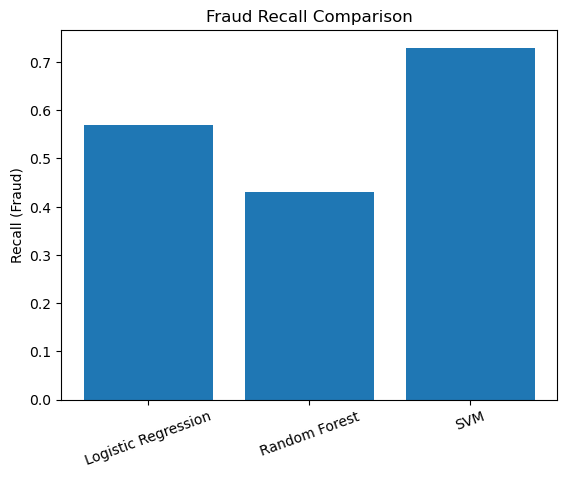

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results_df["Model"], results_df["Fraud Recall"])
plt.title("Fraud Recall Comparison")
plt.ylabel("Recall (Fraud)")
plt.xticks(rotation=20)
plt.show()


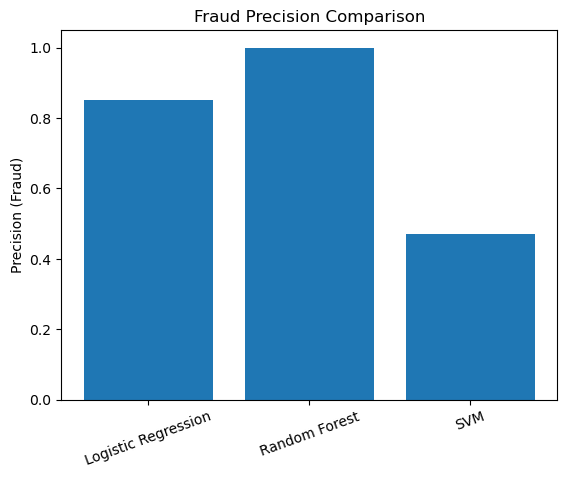

In [36]:
plt.figure()
plt.bar(results_df["Model"], results_df["Fraud Precision"])
plt.title("Fraud Precision Comparison")
plt.ylabel("Precision (Fraud)")
plt.xticks(rotation=20)
plt.show()


Result

Cross validation for SVM

In [37]:
from sklearn.model_selection import cross_val_score
svm_model_cv = SVC(kernel ='rbf',class_weight = 'balanced',random_state = 42)
scores = cross_val_score(svm_model_cv,X_train_scaled,y_train,cv=5,scoring='recall')
print("recall scores for each fold:",scores)
print("average recall: ",np.mean(scores))

recall scores for each fold: [0.83333333 0.875      0.95833333 0.79166667 0.88      ]
average recall:  0.8676666666666668


ROC Curve and AUC

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
svm_model_prob = SVC(kernel = 'rbf',class_weight = 'balanced',random_state = 42, probability=True)
svm_model_prob.fit(X_train_scaled,y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [39]:
y_prob_svm = svm_model_prob.predict_proba(X_test_scaled)[:,1]


Compute Roc curve


In [40]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob_svm)

Compute AUC

AUC Score:  0.9908121827411168


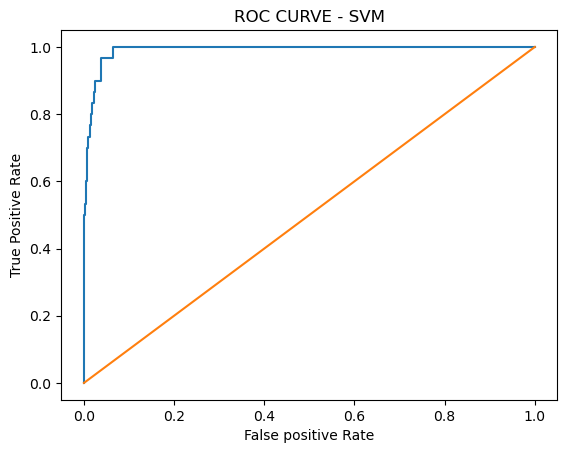

In [41]:
auc_score = roc_auc_score(y_test,y_prob_svm)
print("AUC Score: ",auc_score)
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title("ROC CURVE - SVM")
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Threshold Tuning

In [42]:
import numpy as np
from sklearn.metrics import recall_score, precision_score
thresholds = [0.3,0.4,0.5,0.6,0.7]
for t in thresholds:
    y_pred_custom = (y_prob_svm>=t).astype(int)
    recall = recall_score(y_test,y_pred_custom)
    precision = precision_score(y_test,y_pred_custom)
    print(f"Threshold : {t}")
    print("Recall: ",recall)
    print("Precision: ",precision)
    print("_"*30)

Threshold : 0.3
Recall:  0.7
Precision:  0.6
______________________________
Threshold : 0.4
Recall:  0.6
Precision:  0.6666666666666666
______________________________
Threshold : 0.5
Recall:  0.5333333333333333
Precision:  0.6956521739130435
______________________________
Threshold : 0.6
Recall:  0.5
Precision:  0.75
______________________________
Threshold : 0.7
Recall:  0.5
Precision:  0.9375
______________________________


In [43]:
import joblib

# Save scaler and model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(svm_model_prob, "fraud_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [44]:
import joblib
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [45]:
X = df.drop("is_fraud", axis=1)
feature_columns = X.columns.tolist()
print(feature_columns)

['amount', 'transaction_hour', 'foreign_transaction', 'location_mismatch', 'device_trust_score', 'velocity_last_24h', 'cardholder_age', 'merchant_category_Electronics', 'merchant_category_Food', 'merchant_category_Grocery', 'merchant_category_Travel']


In [46]:
import joblib

joblib.dump(feature_columns, "feature_columns.pkl")

['feature_columns.pkl']

In [47]:
import numpy as np

# Normal input
normal = np.array([[150, 13, 0, 0, 85, 1, 38, 0, 1, 0, 0]])

# Extreme fraud input
fraud = np.array([[10000, 3, 1, 1, 0, 25, 18, 0, 0, 0, 1]])

normal_scaled = scaler.transform(normal)
fraud_scaled = scaler.transform(fraud)

print("Normal prob:", model.predict_proba(normal_scaled)[0][1])
print("Fraud prob:", model.predict_proba(fraud_scaled)[0][1])

c:\Users\91979\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\91979\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NameError: name 'model' is not defined